# Applying Linear Regression:
______________________________________________

## The Problem:
Assume that you are at a party, and that you wish to drink the best wine that is available. We will use machine learning to predict the quality of the wine based on its physicochemical attributes.

## The Data Set:
The UCI Machine Learning Repository's Wine data set measures eleven
physicochemical attributes, including the pH and alcohol content, of 1,599 different
red wines. The scores range from zero to ten; zero is the worst quality and ten is the best quality. The data set can
be downloaded from https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/. We will approach this problem as a regression task and regress the wine's quality onto one or more physicochemical attributes.

## Exploring the Data using Pandas

In [1]:
import pandas as pd
df = pd.read_csv('datasets/winequality-red.csv', sep=';')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Visualizing the data using Matplotlib
Visualizing the data can help indicate if relationships exist between the response variable and the explanatory variables. This is where matplotlib comes in handy.

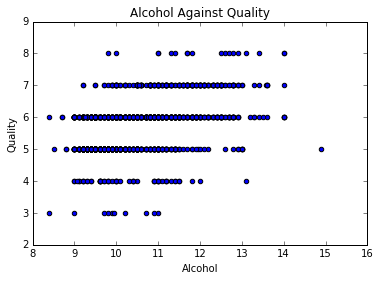

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(df['alcohol'], df['quality'])
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Alcohol Against Quality')
plt.show()

A weak positive relationship between the alcohol content and quality is visible in the
scatter plot in the preceding figure; wines that have high alcohol content are often
high in quality.

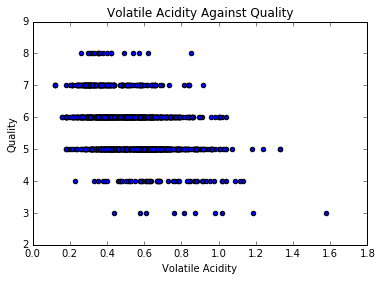

In [3]:
plt.scatter(df['volatile acidity'], df['quality'])
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.title('Volatile Acidity Against Quality')
plt.show()

This figure reveals a negative relationship between volatile
acidity and quality.

These plots suggest that the response variable depends on multiple explanatory variables; let's model the relationship with multiple linear regression. 

But how can we decide which explanatory variables or features to include in the model?
Dataframe.corr() calculates a pairwise correlation matrix. The correlation matrix confirms that the strongest positive correlation is between the alcohol and quality, and that quality is negatively correlated with volatile acidity.

___

## Fitting and evaluating the model 
Now we will split the data into training and testing sets, train the regressor, and evaluate its predictions.

In [4]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split

df = pd.read_csv('datasets/winequality-red.csv', sep=';')
X = df[list(df.columns)[:-1]]
y = df['quality']

# We use the train_test_split function to randomly partition the data into training and test set. 
# By default, 25 percent of the data is assigned to the test set.

#Finally, we trained the model and evaluated it on the test set.
X_train, X_test, y_train, y_test = train_test_split(X, y)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)
print 'R-squared:', regressor.score(X_test, y_test)

R-squared: 0.302453396754


The r-squared score of 0.35 indicates that 35 percent of the variance in the test set is explained by the model. The performance might change if a different 75 percent of the data is partitioned to the training set. We can use cross-validation to produce a better estimate of the estimator's performance. Each cross-validation round trains and tests different partitions of the data to reduce variability.

In [5]:
import pandas as pd
from sklearn. cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
df = pd.read_csv('datasets/winequality-red.csv', sep=';')
X = df[list(df.columns)[:-1]]
y = df['quality']
regressor = LinearRegression()
scores = cross_val_score(regressor, X, y, cv=5)
print "Average of scores: ", scores.mean()
print "Cross validation scores: ", scores

Average of scores:  0.290041628842
Cross validation scores:  [ 0.13200871  0.31858135  0.34955348  0.369145    0.2809196 ]


The cross_val_score helper function allows us to easily perform cross-validation
using the provided data and estimator. We specified a five-fold cross validation
using the cv keyword argument, that is, each instance will be randomly assigned
to one of the five partitions. Each partition will be used to train and test the model.
cross_val_score returns the value of the estimator's score method for each
round. The r-squared scores range from 0.13 to 0.36! The mean of the scores, 0.29, is a
better estimate of the estimator's predictive power than the r-squared score produced
from a single train / test split.

In [6]:
#Let's inspect some of the model's predictions and plot the true quality scores against the predicted scores:

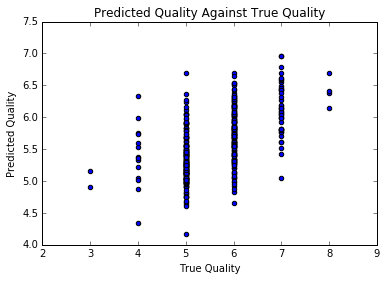

In [7]:
plt.scatter(y_test,y_predictions)
plt.xlabel('True Quality')
plt.ylabel('Predicted Quality')
plt.title('Predicted Quality Against True Quality')
plt.show()

As expected, few predictions exactly match the true values of the response variable.
The model is also better at predicting the qualities of average wines, since most of the
training data is for average wines.

____

## Fitting models with gradient descent
Gradient descent is an optimization algorithm that can be used to estimate
the local minimum of a function.

We can use gradient descent to find the values of the model's parameters that
minimize the value of the cost function. Gradient descent iteratively updates the
values of the model's parameters by calculating the partial derivative of the cost
function at each step. The calculus required to compute the partial derivative of
the cost function is beyond the scope of this example, and is also not required to work
with scikit-learn. However, having an intuition for how gradient descent works
can help you use it effectively.

There are two varieties of gradient descent that are distinguished by the number of training instances that are used to update the model parameters in each training iteration.
1. Batch gradient descent, which is sometimes called only gradient descent, uses all of the training instances to update the model parameters in each iteration.
2. Stochastic Gradient Descent (SGD), in contrast, updates the parameters using only a single training instance in each iteration. The training instance is usually selected randomly. Stochastic gradient descent is often preferred to optimize cost functions when there are hundreds of thousands of training instances or more, as it will converge more quickly than batch gradient descent.

Batch gradient descent is a deterministic algorithm, and will produce the same parameter values given the same training set. As a stochastic algorithm, SGD can produce different parameter estimates each time it is run. SGD may not minimize the cost function as well as gradient descent because it uses only single training instances to update the weights.

____

# Problem 2:

## Predict the prices of houses in the Boston Housing data set from 13 features

Here we use stochastic gradient descent to estimate the parameters of a model with
scikit-learn. SGDRegressor is an implementation of SGD that can be used even for
regression problems with hundreds of thousands or more features. It can be used
to optimize different cost functions to fit different linear models; by default, it will
optimize the residual sum of squares. 

In [8]:
import numpy as np
from sklearn.datasets import load_boston  # Importing the dataset of housing prices which is built in with scikit-learn
from sklearn.linear_model import SGDRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
data = load_boston()
X_train, X_test, y_train, y_test = train_test_split(data.data,
data.target)

In [9]:
# Scaling the features using StandardScaler:
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train)
X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

C:\Miniconda2\lib\site-packages\sklearn\preprocessing\data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Miniconda2\lib\site-packages\sklearn\preprocessing\data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Miniconda2\lib\site-packages\sklearn\preprocessing\data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it co

Training the estimator, and evaluating it using cross validation and the test set.

In [10]:
regressor = SGDRegressor(loss='squared_loss')
scores = cross_val_score(regressor, X_train, y_train, cv=5)
print 'Cross validation r-squared scores:', scores
print 'Average cross validation r-squared score:', np.mean(scores)
regressor.fit_transform(X_train, y_train)
print 'Test set r-squared score', regressor.score(X_test, y_test)

Cross validation r-squared scores: [ 0.76269456  0.49502097  0.6853013   0.77086734  0.74650936]
Average cross validation r-squared score: 0.692078705429
Test set r-squared score 0.700807130046


C:\Miniconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


________________________________________________________________________________________________________________________________

## Summary:
We assessed the fitness of models using the residual sum of squares cost function and discussed two methods to learn the values of a model's parameters that minimize the cost function. 

First, we solved the values of the model's parameters analytically. We then discussed gradient descent, a method that can efficiently estimate the optimal values of the model's parameters even when the model has a large number of features.

The features in these examples were simple measurements of their explanatory variables; it was easy to use them in our models. However there maybe some models which would require features for different types of explanatory variables, including categorical
variables, text, and images.

________________________________________________________________________________________________________________________________